# CarMax Analytics Showcase
- Competition: https://analyticsshowcase.carmax.com
- Data: https://github.com/kmx-analytics-showcase/Winter-2023

In [1]:
import numpy as np
import pandas as pd
from pySankey.sankey import sankey

## Data Load

In [2]:
# load clean data
file = 'data/cleaned_data.pkl'
df = pd.read_pickle(file)
df.shape

(200000, 32)

In [3]:
df.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 32 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   price                                category
 1   price_appraisal                      category
 2   online_appraisal_flag                Int8    
 3   market                               category
 4   model_year                           Int16   
 5   mileage                              category
 6   make                                 category
 7   model                                object  
 8   premium_trim                         int64   
 9   body                                 category
 10  color                                category
 11  engine                               object  
 12  cylinders                            Int8    
 13  mpg                                  float64 
 14  horsepower                           Int16   
 15  fuel_capacity    

In [4]:
# numeric
df.describe().round(decimals = 1).T

,count,mean,std,min,25%,50%,75%,max
online_appraisal_flag,200000.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
model_year,200000.0,2012.6,2.1,1991.0,2012.0,2013.0,2014.0,2017.0
premium_trim,200000.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
cylinders,200000.0,5.0,1.4,0.0,4.0,4.0,6.0,16.0
mpg,200000.0,25.4,5.3,12.4,21.2,24.7,29.0,57.9
horsepower,200000.0,237.0,76.6,11.0,175.0,228.0,290.0,760.0
fuel_capacity,200000.0,17.6,4.3,1.0,14.0,17.0,19.0,48.0
model_year_appraisal,200000.0,2007.8,4.9,1986.0,2005.0,2009.0,2012.0,2017.0
premium_trim_appraisal,200000.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
cylinders_appraisal,200000.0,5.1,1.3,3.0,4.0,4.0,6.0,10.0


In [5]:
# non-numeric
df.describe(include = ['object','category']).T

,count,unique,top,freq
price,200000,13,$20k to $25k,46388
price_appraisal,200000,9,$0k to $5k,69180
market,200000,16,14,19729
mileage,200000,21,25k to 30k miles,18740
make,200000,37,AIH,26201
model,200000,575,HXQ_8,5528
body,200000,6,E,115268
color,200000,16,White,45231
engine,200000,49,2.0L,36654
mileage_appraisal,200000,21,50k to 60k miles,14163


In [6]:
# data sample
df.sample(5).T

,161166,165447,15251,189077,102343
price,$25k to $30k,$15k to $20k,$20k to $25k,$35k to $40k,$15k to $20k
price_appraisal,$5k to $10k,$0k to $5k,$0k to $5k,$10k to $15k,$10k to $15k
online_appraisal_flag,0,0,0,1,0
market,3,7,5,9,1
model_year,2011,2011,2015,2015,2013
mileage,55k to 60k miles,55k to 60k miles,45k to 50k miles,5k to 10k miles,35k to 40k miles
make,KQZ,ARU,HXQ,FJE,HDT
model,KQZ_3,ARU_4,HXQ_14,FJE_10,HDT_7
premium_trim,0,0,1,1,1
body,D,E,F,F,F


## Price Delta
- This is the net revenue of an appraisal-to-purchase customer
- ~$5.9k average

### Appraisal Price

$0k to $5k      69180
$5k to $10k     38688
$10k to $15k    28387
$15k to $20k    23102
$20k to $25k    16791
$25k to $30k    10374
$30k to $35k     6093
$35k to $40k     3690
$40k+            3695
Name: price_appraisal, dtype: int64
total 200000


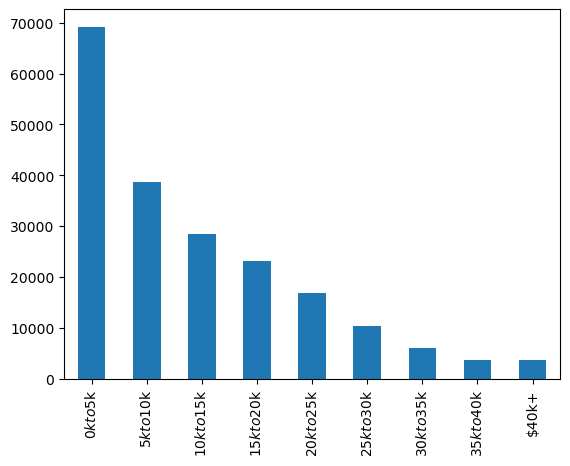

In [7]:
# appraisal offer on "old" vehicle distribution

price_appraisal = df['price_appraisal'].value_counts().sort_index()
print(price_appraisal)
print('total',price_appraisal.sum())
ax = price_appraisal.plot.bar()

### Purchase Price

$0 to $15k       8841
$15k to $20k    34577
$20k to $25k    46388
$25k to $30k    40420
$30k to $35k    28407
$35k to $40k    20076
$40k to $45k    10697
$45k to $50k     5439
$50k to $55k     2415
$55k to $60k     1305
$60k to $65k      590
$65k to $70k      359
$70k+             486
Name: price, dtype: int64
total 200000


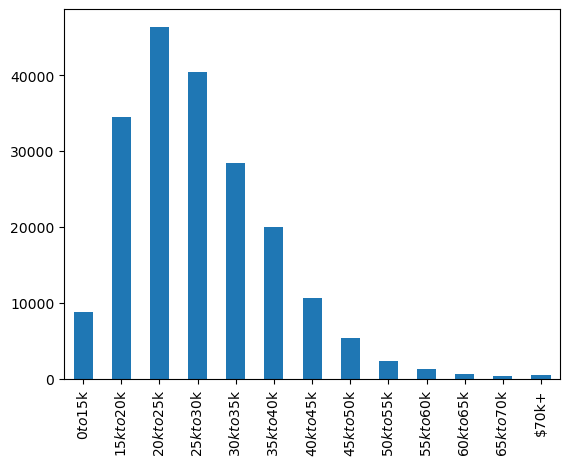

In [8]:
# purchase price of "new" vehicle distribution

price = df['price'].value_counts().sort_index()
print(price)
print('total',price.sum())
ax = price.plot.bar()

### Appraisal to Purchase Price

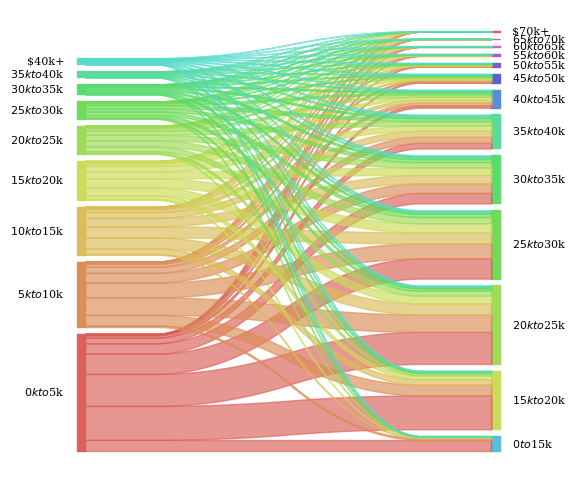

In [9]:
# movement from appraisal offer to purchase price

df = df.sort_values(by=['price_appraisal','price'])
sankey(df['price_appraisal'], df['price'], aspect=40, fontsize=8)

In [17]:
# code price ranks
df['price_appraisal_rank'] = df['price_appraisal'].cat.codes
df['price_rank'] = df['price'].cat.codes

In [18]:
# difference between customer appraisal and purchase prices
df['price_delta'] = (df['price_rank'] - df['price_appraisal_rank'])
df['price_delta'].describe().round(decimals = 1)

count    200000.0
mean          1.2
std           2.2
min          -8.0
25%           0.0
50%           1.0
75%           2.0
max          12.0
Name: price_delta, dtype: float64

In [24]:
df['price_delta'].mean()*5

5.8968

## Brand Loyalty
- 18% of customers keep the same make. I would call this low brand loyalty.

In [20]:
# customer buys same brand
df['same_make'] = np.where(df['make'].astype('str') == df['make_appraisal'].astype('str'), 1, 0)

In [22]:
df['same_make'].mean()

0.180895